In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
real = pd.read_csv('data/True.csv')
real["label"] = 0
fake = pd.read_csv('data/Fake.csv')
fake["label"] = 1

In [3]:
data_df = pd.concat([real, fake], ignore_index=True).drop(['title','subject','date'],axis=1)
data_df.count()

text     44898
label    44898
dtype: int64

In [4]:
data_df.groupby("label").count()

,text
label,
0,21417
1,23481


In [5]:
for i in range(len(data_df)):
    data_df.loc[i, "token_length"] = len(data_df.loc[i, "text"].strip().split())

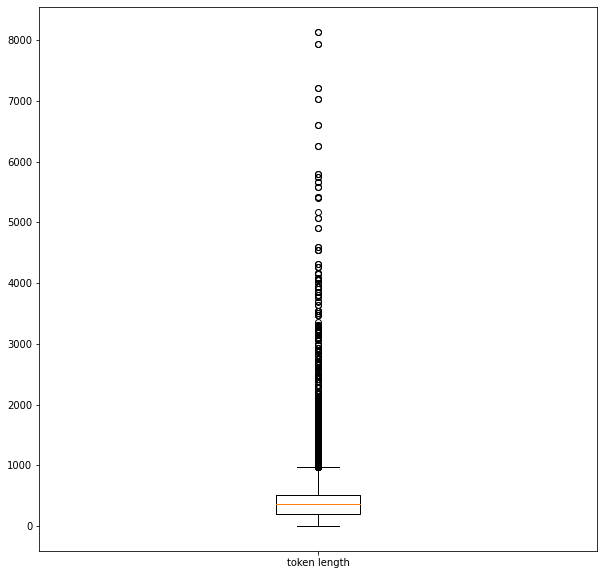

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.boxplot(data_df["token_length"], labels=["token length"])
plt.show()

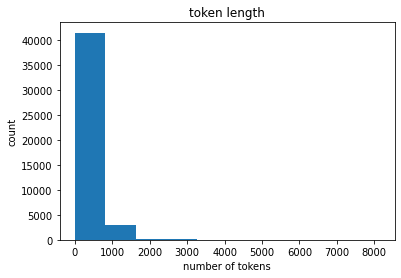

In [7]:
plt.hist(data_df["token_length"])
plt.title("token length")
plt.xlabel("number of tokens")
plt.ylabel("count")
plt.show()

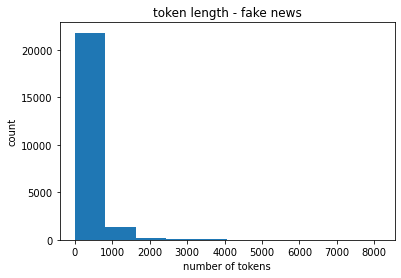

In [8]:
plt.hist(data_df[data_df["label"] == 1]["token_length"])
plt.title("token length - fake news")
plt.xlabel("number of tokens")
plt.ylabel("count")
plt.show()

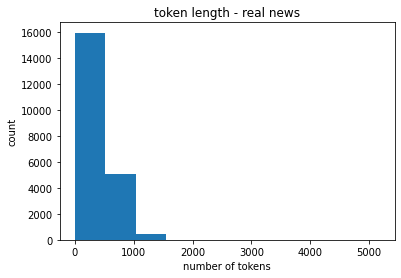

In [9]:
plt.hist(data_df[data_df["label"] == 0]["token_length"])
plt.title("token length - real news")
plt.xlabel("number of tokens")
plt.ylabel("count")
plt.show()

In [10]:
cleaned_feat_df = pd.read_csv('data/feat_new.csv')

In [11]:
cleaned_feat_df = cleaned_feat_df[cleaned_feat_df.label.notna()]
cleaned_feat_df = cleaned_feat_df[cleaned_feat_df.text.notna()]
cleaned_feat_df.fillna(0, inplace=True)
temp_df = cleaned_feat_df.copy()
Y = temp_df[["label"]].astype(int)
temp_df.drop(['label', 'text'], inplace=True, axis=1)
X = temp_df.astype(float)


In [12]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [13]:
low_dim_data = pca.transform(X)

In [23]:
data_to_plot={}

for i in range(low_dim_data.shape[0]):
    try:
        label = Y.loc[i, "label"]
    except:
        continue
    if data_to_plot.get(label) is None:
        x = [low_dim_data[i][0]]
        y = [low_dim_data[i][1]]
        data_to_plot[label] = {
                                "X": x,
                                "Y": y
                            }
    else:
        x = data_to_plot.get(label).get("X")
        y = data_to_plot.get(label).get("Y")
        x.append(low_dim_data[i][0])
        y.append(low_dim_data[i][1])    

In [15]:
len(data_to_plot.get(0).get("X"))

21416

In [16]:
len(data_to_plot.get(1).get("X"))

22050

### Visualizing featurized data in 2 dimensions

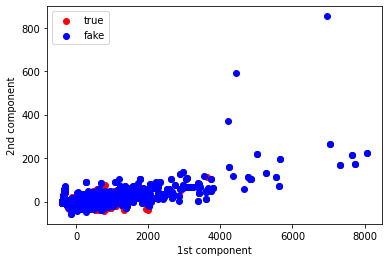

In [21]:
fig = plt.figure()
c = ["red", "blue"]
l = ["true", "fake"]

for key in data_to_plot.keys():
    plt.scatter(data_to_plot.get(key).get("X"), data_to_plot.get(key).get("Y"), c=c[int(key)], label=l[int(key)])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend()
plt.show()

Text(0, 0.5, '2nd component')

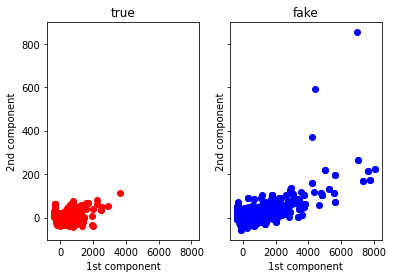

In [27]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)
c = ["red", "blue"]
l = ["true", "fake"]

for key in data_to_plot.keys():
    if key == 1:
        axs[1].scatter(data_to_plot.get(key).get("X"), data_to_plot.get(key).get("Y"), c=c[int(key)], label=l[int(key)])
    elif key == 0:
        axs[0].scatter(data_to_plot.get(key).get("X"), data_to_plot.get(key).get("Y"), c=c[int(key)], label=l[int(key)])


axs[0].set_title("true")
axs[0].set_xlabel("1st component")
axs[0].set_ylabel("2nd component")
axs[1].set_title("fake")
axs[1].set_xlabel("1st component")
axs[1].set_ylabel("2nd component")